# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
from citipy import citipy
import random
import pandas as pd
import json
from api_keys import (weather_api_key, g_key)
import requests
import numpy as np
import pandas as pd
from citipy import citipy
import matplotlib.pyplot as plt
import pprint
import urllib

cities_file = ("../output_data/cities.csv")
# cities_df = pd.read_csv(cities_file)
# cities_df

## Generate Cities List

In [2]:
cities = []
count = 0
latitude_longitude = []

# Create a set of random latitude and longitude combinations
Latitude = np.random.uniform(low=-90.000, high=90.000, size=1550)
Longitude = np.random.uniform(low=-180.000, high=180.000, size=1553)
latitude_longitude = zip(Latitude, Longitude)

# Identify nearest city for each latitude and longitude combinations
for lat_lng in latitude_longitude:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        count = count + 1
len(cities)


612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" 
wkey = "25bc90a1196e6f153eece0bc0b0fc9eb"
appid = wkey
settings = {"units": "Standard", "appid": weather_api_key}
url = f"{url}appid={wkey}&units={units}"
city_data = []
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_latitute = city_weather["coord"]["lat"]
        city_longitude = city_weather["coord"]["lon"]
        city_max_temperature = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_latitute, 
                          "Lng": city_longitude, 
                          "Max Temp": city_max_temperature,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found...")
        pass

Processing Record 1 of Set 1 | galle
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=galle
Processing Record 2 of Set 1 | sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sentyabrskiy
City not found...
Processing Record 3 of Set 1 | alice springs
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=alice%20springs
Processing Record 4 of Set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=punta%20arenas
Processing Record 5 of Set 1 | sao filipe
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sao%20filipe
Processing Record 6 of Set 1 | treinta y tres
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=treinta%20y%20tres
Processing Record 7 of S

Processing Record 4 of Set 2 | olinda
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=olinda
Processing Record 5 of Set 2 | ahipara
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ahipara
Processing Record 6 of Set 2 | ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ushuaia
Processing Record 7 of Set 2 | atambua
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=atambua
Processing Record 8 of Set 2 | katsuura
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=katsuura
Processing Record 9 of Set 2 | saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=saskylakh
Processing Record 10 of Set 2 | yellowknife
http://api.openweathermap.org/data/2.5/weather?appid

Processing Record 7 of Set 3 | lolua
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=lolua
City not found...
Processing Record 8 of Set 3 | hermanus
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hermanus
Processing Record 9 of Set 3 | wembley
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=wembley
Processing Record 10 of Set 3 | isangel
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=isangel
Processing Record 11 of Set 3 | faya
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=faya
Processing Record 12 of Set 3 | harigue
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=harigue
City not found...
Processing Record 13 of Set 3 | ahuimanu
http://api.openweathermap.or

Processing Record 12 of Set 4 | scarborough
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=scarborough
Processing Record 13 of Set 4 | quelimane
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=quelimane
Processing Record 14 of Set 4 | kenora
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kenora
Processing Record 15 of Set 4 | marcona
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=marcona
City not found...
Processing Record 16 of Set 4 | honiara
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=honiara
Processing Record 17 of Set 4 | martapura
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=martapura
Processing Record 18 of Set 4 | guarapari
http://api.openweath

Processing Record 15 of Set 5 | samusu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=samusu
City not found...
Processing Record 16 of Set 5 | kutum
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kutum
Processing Record 17 of Set 5 | barawe
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=barawe
City not found...
Processing Record 18 of Set 5 | trelleborg
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=trelleborg
Processing Record 19 of Set 5 | avarua
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=avarua
Processing Record 20 of Set 5 | fort nelson
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=fort%20nelson
Processing Record 21 of Set 5 | agadir
http://api.op

City not found...
Processing Record 18 of Set 6 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ponta%20do%20sol
Processing Record 19 of Set 6 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=lavrentiya
Processing Record 20 of Set 6 | kitob
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kitob
Processing Record 21 of Set 6 | ibirataia
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ibirataia
Processing Record 22 of Set 6 | port macquarie
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=port%20macquarie
Processing Record 23 of Set 6 | banepa
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=banepa
Processing Record 24 of Set 6 | filingue
h

Processing Record 21 of Set 7 | marawi
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=marawi
Processing Record 22 of Set 7 | mjolby
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=mjolby
Processing Record 23 of Set 7 | wattegama
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=wattegama
Processing Record 24 of Set 7 | dunedin
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=dunedin
Processing Record 25 of Set 7 | walvis bay
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=walvis%20bay
Processing Record 26 of Set 7 | moose factory
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=moose%20factory
Processing Record 27 of Set 7 | bucerias
http://api.openweathermap.org/d

Processing Record 25 of Set 8 | tautira
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tautira
Processing Record 26 of Set 8 | artyk
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=artyk
City not found...
Processing Record 27 of Set 8 | wanning
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=wanning
Processing Record 28 of Set 8 | port lincoln
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=port%20lincoln
Processing Record 29 of Set 8 | chapais
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=chapais
Processing Record 30 of Set 8 | labuan
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=labuan
Processing Record 31 of Set 8 | cam ranh
http://api.openweathermap.org

Processing Record 29 of Set 9 | burnie
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=burnie
Processing Record 30 of Set 9 | hanzhong
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hanzhong
Processing Record 31 of Set 9 | maniitsoq
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=maniitsoq
Processing Record 32 of Set 9 | san isidro
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=san%20isidro
Processing Record 33 of Set 9 | dali
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=dali
Processing Record 34 of Set 9 | saint-denis
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=saint-denis
Processing Record 35 of Set 9 | seoul
http://api.openweathermap.org/data/2.5/wea

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bur%20gabo
City not found...
Processing Record 34 of Set 10 | yirol
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=yirol
City not found...
Processing Record 35 of Set 10 | fort saint john
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=fort%20saint%20john
City not found...
Processing Record 36 of Set 10 | roald
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=roald
Processing Record 37 of Set 10 | anadyr
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=anadyr
Processing Record 38 of Set 10 | kashi
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kashi
Processing Record 39 of Set 10 | chiang khong
http://api.openweath

Processing Record 36 of Set 11 | marquette
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=marquette
Processing Record 37 of Set 11 | buchanan
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=buchanan
Processing Record 38 of Set 11 | san jose
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=san%20jose
Processing Record 39 of Set 11 | karema
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=karema
Processing Record 40 of Set 11 | periyapatti
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=periyapatti
Processing Record 41 of Set 11 | zelenoborskiy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=zelenoborskiy
Processing Record 42 of Set 11 | ramnagar
http://api.openwea

Processing Record 39 of Set 12 | timra
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=timra
Processing Record 40 of Set 12 | sao domingos
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sao%20domingos
Processing Record 41 of Set 12 | gundorovskiy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=gundorovskiy
Processing Record 42 of Set 12 | vuktyl
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=vuktyl
Processing Record 43 of Set 12 | ambodifototra
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ambodifototra
City not found...
Processing Record 44 of Set 12 | iwamizawa
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=iwamizawa
Processing Record 45 of Set 12 | noume

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data_pd = pd.DataFrame(city_data)
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind,Country,Date
0,galle,6.04,80.22,82.54,78,66,12.93,LK,1601354503
1,alice springs,-23.70,133.88,84.20,10,75,23.04,AU,1601354197
2,punta arenas,-53.15,-70.92,30.20,86,20,13.87,CL,1601354684
3,sao filipe,14.90,-24.50,79.92,80,11,12.28,CV,1601354735
4,treinta y tres,-33.23,-54.38,46.20,79,0,3.44,UY,1601354782


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind,Date
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02
mean,20.429355,21.039659,64.779857,70.838710,53.197133,7.710215,1.601355e+09
std,32.495309,90.589598,16.585651,20.351114,37.933238,4.995243,1.740799e+02
min,-54.800000,-175.200000,12.690000,8.000000,0.000000,0.220000,1.601354e+09
25%,-5.470000,-55.772500,51.800000,58.000000,20.000000,4.012500,1.601355e+09
50%,22.205000,22.930000,67.855000,75.000000,58.000000,6.710000,1.601355e+09
75%,48.360000,105.240000,78.722500,87.000000,90.000000,10.290000,1.601355e+09
max,78.220000,178.420000,100.400000,100.000000,100.000000,26.660000,1.601355e+09


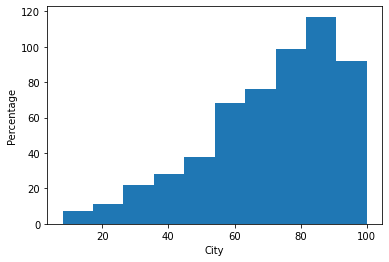

In [10]:
import scipy.stats as sts
plt.hist(city_data_pd['Humidity'])
plt.xlabel('City')
plt.ylabel('Percentage')
plt.show()

In [11]:
# Determine if there are any potential outliers in the average occupancy in California
quartiles = city_data_pd['Humidity'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Humidity is: {lowerq}")
print(f"The upper quartile of Humidity is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Humidity is: 58.0
The upper quartile of Humidity is: 87.0
The interquartile range of temperatures is: 29.0
The the median of temperatures is: 75.0 
Values below 14.5 could be outliers.
Values above 130.5 could be outliers.


In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_pd.loc[(city_data_pd['Humidity'] > lower_bound) | (city_data_pd['Humidity'] < upper_bound)]
clean_city_data.reset_index()

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind,Country,Date
0,0,galle,6.04,80.22,82.54,78,66,12.93,LK,1601354503
1,1,alice springs,-23.70,133.88,84.20,10,75,23.04,AU,1601354197
2,2,punta arenas,-53.15,-70.92,30.20,86,20,13.87,CL,1601354684
3,3,sao filipe,14.90,-24.50,79.92,80,11,12.28,CV,1601354735
4,4,treinta y tres,-33.23,-54.38,46.20,79,0,3.44,UY,1601354782
...,...,...,...,...,...,...,...,...,...,...
553,553,khani,41.96,42.96,69.80,46,15,24.16,GE,1601354943
554,554,aleysk,52.49,82.78,45.36,71,100,18.43,RU,1601354944
555,555,san angelo,31.46,-100.44,57.20,47,1,4.99,US,1601354771
556,556,bulgan,48.81,103.53,52.29,45,6,5.28,MN,1601354620


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

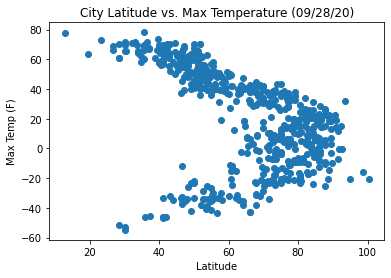

<Figure size 432x288 with 0 Axes>

In [34]:
import time
plt.scatter(clean_city_data['Max Temp'],clean_city_data['Lat'])
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.show()
plt.savefig("Latitude vs Temperature (F).png")

## Latitude vs. Humidity Plot

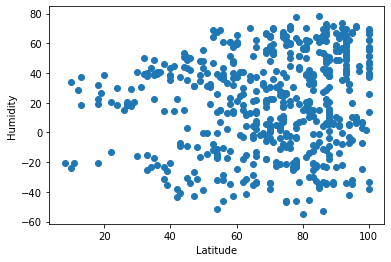

In [30]:
plt.scatter(clean_city_data['Humidity'],clean_city_data['Lat'])
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel('Humidity')
plt.show()
plt.savefig("Latitude vs Humidty.png")

## Latitude vs. Cloudiness Plot

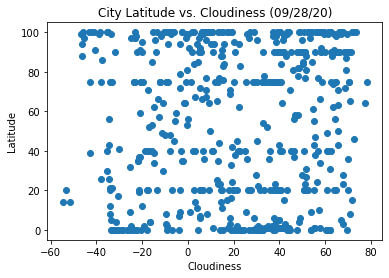

<Figure size 432x288 with 0 Axes>

In [38]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Cloudiness'])
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Cloudiness")
plt.ylabel('Latitude')
plt.show()
plt.savefig("Latitude vs Cloudiness (%).png")

## Latitude vs. Wind Speed Plot

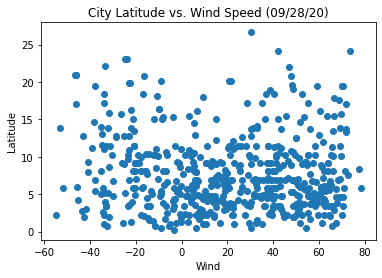

<Figure size 432x288 with 0 Axes>

In [39]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Wind'])
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Wind")
plt.ylabel('Latitude')
plt.show()
plt.savefig("Latitude vs Wind Speed (MPH).png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


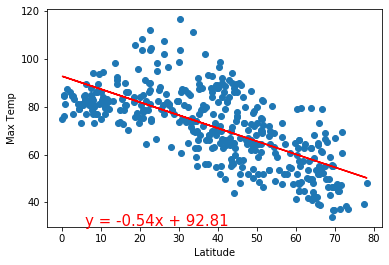

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


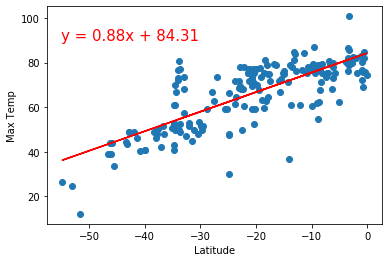

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


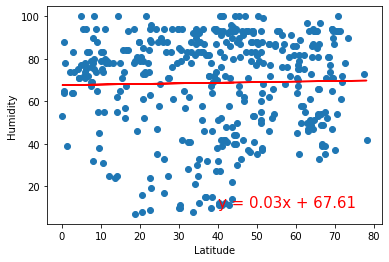

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


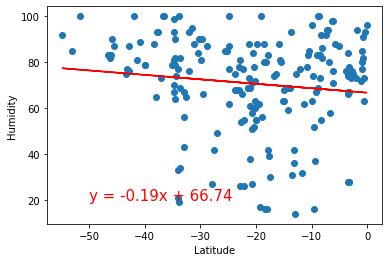

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


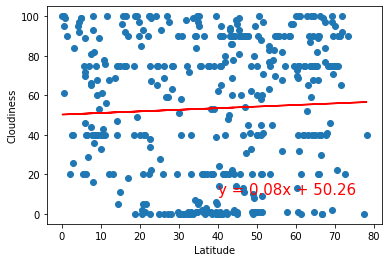

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


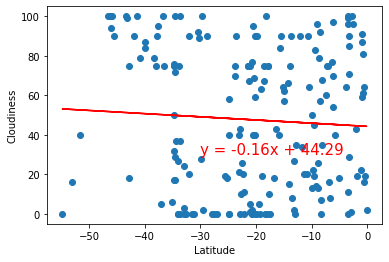

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


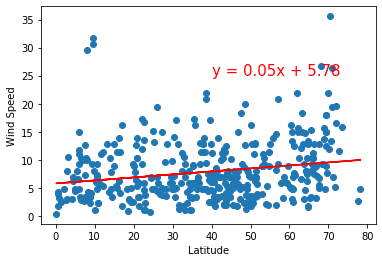

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


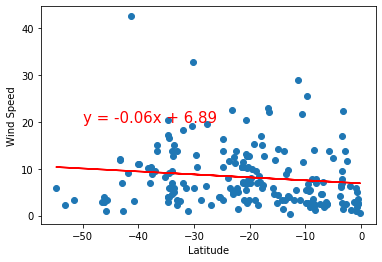